## Temperature and CO2 locally and Globally

#### This script is made for the learningday for technical staff at UiB the 22 of February 2024. 
*I've made this type of exercises as part of the project "Ekte Data" in collaboration with "Skolelaboratoriet" for natural sciences at UiB. The past two years we have focused on developing an intro course to programming in Python. All the exercises are based on real data sets and scientific questions. Our goal is to make the connection between natural sciences, mathematics, and programming clear. You can find more programming exercises and tools to get started [here](https://github.com/irendundas/EkteData).*
 
Vår Dundas, PhD candidate in physical oceanography at the Geophysical Institute, UiB

------------------
The goal of this exercise is to give an intro to how you can work with data in Python. We use data of temperature and CO2 to go though: 
- **Loading data into your script** 💾
- **Use of libraries** 📖
- **Use of functions** 🎯
- **How to structure your variables** 🗃️
- **Visualization** 🎨

The cases we look at are
- Temperatureanomlies from Bergen and globally
- Linear trends for different time periods
- Anomalies in global CO2 in the atmosphere
- Different ways to present and compare data 

Vi use four data sets:
- Temperature data for Bergen: [download here](https://github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt). This data set is compiled by Hele Drange, and is based on data from the Norwegian Meteorological Institute. 
- Temperature data globally: [download here](https://climate.metoffice.cloud/temperature.html#datasets) (scroll down to "Get the data" and download HadCRUT5, NOAAGlobalTemp, or GISTEMP as csv-file. In this example I use HadCRUT5). 
- CO2 data until 2004 (NOAA): [download here](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt). These data are based on ice cores. The dataset has a lot of information we do not need, and we load it into this script in a tidy way roughly halfway into the exercise.  
- CO2 data from 1959 until today (NOAA): [download here](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt) 

The temperature stripe figures in this exercise are inspired by [Ed Hawkins' original figure ](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).


In [1]:
# Load the libraries you need 📖

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
SMALL_SIZE = 13
MEDIUM_SIZE = 17
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Part 1: Temperature
In this part we look at temperature anomalies. This means that we look at temperature deviations relative to a defines reference period. For HadCRUT5 the reference period is 1961–1990 ([Morice et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD032361)).

### Import the data set of global temperature
Follow this [link](https://climate.metoffice.cloud/temperature.html#datasets) and download one of the data sets under **Global mean temperature**. Make sure that you save the file somewhere logical. 
Below I use the data from HadCRUT5.
Import the data of global temperature into Python. We use the library "Pandas". This library is perfect for working with data in 2D. If you need to import data with more than two dimensions I would recommend the library "xarray". A lot of the functionality is the same, but it's specifically tailored for multiple dimensions. 

In [9]:
# Specify which file you want to import and where on your computer it's located

# !!! Change the path below to the path where you have the file on your computer!!!
path=r'C:\Users\iren_\Documents\GEOFpython\IkkeGit'
file='/gmt_HadCRUT5.csv'

# Make sure that the result of path+file is exactly where you have the file on your computer
path+file

'C:\\Users\\iren_\\Documents\\GEOFpython\\IkkeGit/gmt_HadCRUT5.csv'

Use Pandas to import the data. 
Look [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for an explanation of the keywords (sep, index_col etc).

To know which keyword arguments (**kwargs in the documentation) you need to use, you have to knwo what your file looks like. I always open my file in a text editor (e.g., notepad) to inspect how columns are separated, what's used as the decimal sign, if there's a header or footer etc. For this purpose you cannot open the file in e.g., excel because this information is not visible.

In [10]:
# Import the data set 💾
df = pd.read_csv(
    path+file, 
    sep=',', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True # Skip spaces after delimiter.
)

# From the doc: index_col=False can be used to force pandas to not use the 
# first column as the index, e.g. when you have a malformed file with 
# delimiters at the end of each line.

In [11]:
# Print out the data set to see what it looks like.Did it import properly? 
df

,1853,0.07,0.160
0,1854,0.05,0.141
1,1855,0.04,0.142
2,1856,0.02,0.148
3,1857,-0.13,0.149
4,1858,-0.05,0.148
...,...,...,...
165,2019,1.23,0.034
166,2020,1.26,0.035
167,2021,1.10,0.036
168,2022,1.14,0.036


In [12]:
# 🗃️
# Make two empty "dictionaries". One for time and one for temperature so that you don't have to keep control of so many 
# variables when we also import time and temp from Bergen below
time, temp={},{}

In [13]:
# Give the first column (iloc[:,0]) to "time" oand the second column (iloc[:,1]) to "temp" 🗃️
time['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

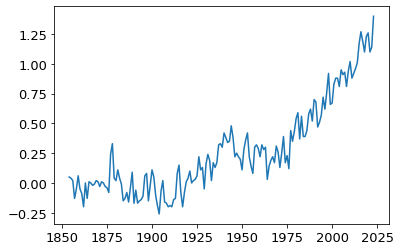

In [14]:
# Make a figure to get a sense of the data 🎨
plt.plot(time['Global'], temp['Global'])

### Import the data set over temperature in Bergen
The data set is available [here](github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt).


In [15]:
# 💾
path=r'C:\Users\iren_\Documents\GEOFpython\IkkeGit'
file='/Bergen_temp1862_2022.txt'

# "Keyword arguments" here are a bit different from da data import above because the dataset from Bergen is a bit
# differently organized than the global data set.
df = pd.read_csv(
    path+file, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True 
)

In [16]:
df

,Year,null,temp,anomaly
0,1862,0,7.76,0.13
1,1863,0,7.78,0.15
2,1864,0,6.91,-0.72
3,1865,0,7.28,-0.35
4,1866,0,7.45,-0.18
...,...,...,...,...
155,2018,0,8.74,1.11
156,2019,0,8.85,1.23
157,2020,0,9.46,1.83
158,2021,0,8.50,0.88


In [17]:
# Save time and temperature as their own variables in the dictionaries time and temp: 🗃️

time['Bergen']=np.copy(df.iloc[:,0])
# We want to look at anomalies, so we set the third column to temp['Bergen']
temp['Bergen']=np.copy(df.iloc[:,3]) 

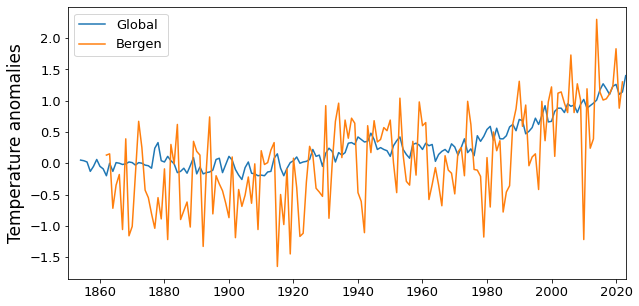

In [18]:
# Plot temperature from both global and Bergen in the same figure 🎨
plt.figure(figsize=(10,5))

plt.plot(time['Global'], temp['Global'], label='Global')
plt.plot(time['Bergen'], temp['Bergen'], label='Bergen')
plt.legend()
plt.ylabel('Temperature anomalies')
plt.xlim([1850,2023])
plt.show()

**Questions**

- Why do the temperature anomalies vary so much more from year to year in Bergen than globally?
- Why is the variability still so similar on longer time scales?

_____________
## Part 2: Trends - long term changes in Bergen: 
Estimate three trend lines, e.g.:
- One for the whole data set, 
- one for the period from when I'm born until today, and
- one for the period from when you're born (ca 1970?) until today. 

In [19]:
# Find the index of year 1994 and 1970. 🎯
id94=np.where(time['Bergen']==1994)[0][0]
id70=np.where(time['Bergen']==1970)[0][0]

# Sjekk at indeksene vi har funnet stemmer
time['Bergen'][id94], time['Bergen'][id70]

(1994, 1970)

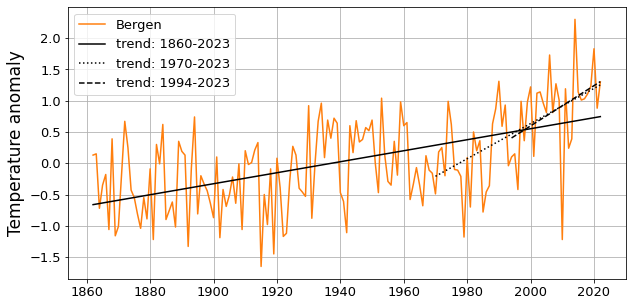

In [20]:
# 🎨
plt.figure(figsize=(10,5))
# The whole time series
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
# trenden til hele tidsserien 🎯
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) 
plt.plot(time['Bergen'], a*time['Bergen'] + b, 'k', label='trend: 1860-2023')
 # trenden siden 1970
a, b = np.polyfit(time['Bergen'][id70:], temp['Bergen'][id70:], 1)
plt.plot(
    time['Bergen'][id70:], a*time['Bergen'][id70:] + b, 
    'k', label='trend: 1970-2023', ls=':'
)
# trenden siden 1994
a, b = np.polyfit(time['Bergen'][id94:], temp['Bergen'][id94:], 1) 
plt.plot(
    time['Bergen'][id94:], a*time['Bergen'][id94:] + b, 
    'k', label='trend: 1994-2023', ls='--'
)

plt.legend()
plt.ylabel('Temperature anomaly')

plt.grid()
plt.show()

In [21]:
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) # The trend of the full time series
x=(a*time['Bergen'][-1] + b)-(a*time['Bergen'][0] + b)
x="{:.1f}".format(x) # Only print out one decimal. 🎯

print(
    'The trend indicates that for the full period, the temperature in Bergen has increased by ', 
    x, 'grader'
)

The trend indicates that for the full period, the temperature in Bergen has increased by  1.4 grader


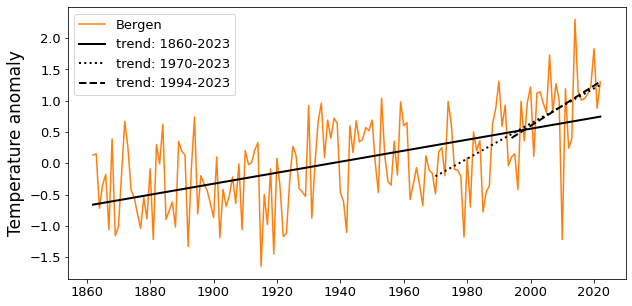

In [22]:
# Plotting the figure is more tidy with a for-loop 🎯🎨
plt.figure(figsize=(10,5))

plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen')

idt=[0, id70, id94]
labels=['trend: 1860-2023', 'trend: 1970-2023', 'trend: 1994-2023']
ls=['-', ':', '--'] # Linestyle
for count,start in enumerate(idt):
    a, b = np.polyfit(time['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        time['Bergen'][start:], a*time['Bergen'][start:] + b, 
        'k', label=labels[count], lw=2, ls=ls[count]
    )
plt.ylabel('Temperature anomaly')
plt.legend()
plt.show()


**Questions**
- What is the difference between the trend lines?
- What happens to the trend lines when the start date for the estimation period increases?
- What does this mean physically?

**Can you trust the trend lines?**
- Estimate the trend for the two periods 1977-2000 and 1990-2013.
- Assume that both the trends represent the change in temperature for Bergen for the past 160 years. 
    - According to trend nr 1, how much has the trend increased since the beginning of the time series?
    - And avvording to trend nr 2?
    


change the past 160 years:  0.5975652173912066 degrees
change the past 160 years:  8.178086956522057 degrees


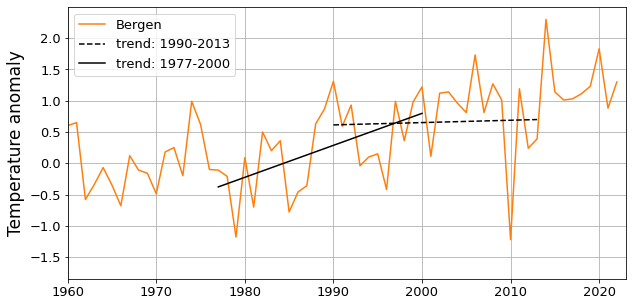

In [23]:
# 🎨
plt.figure(figsize=(10,5))
# The whole time series 
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
id1=np.where(time['Bergen']==1990)[0][0]
id2=np.where(time['Bergen']==2013)[0][0]+1
# trenden siden 1970
a, b = np.polyfit(time['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('change the past 160 years: ', a*160, 'degrees')
plt.plot(
    time['Bergen'][id1:id2], a*time['Bergen'][id1:id2] + b, 
    'k', label='trend: 1990-2013', ls='--'
)
id1=np.where(time['Bergen']==1977)[0][0]
id2=np.where(time['Bergen']==2000)[0][0]+1
# trenden siden 1994
a, b = np.polyfit(time['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('change the past 160 years: ', a*160, 'degrees')
plt.plot(
    time['Bergen'][id1:id2], a*time['Bergen'][id1:id2] + b, 
    'k', label='trend: 1977-2000', ls='-'
)

plt.legend()
plt.ylabel('Temperature anomaly')
plt.xlim(1960, 2023)
plt.grid()
plt.show()

- The difference is large! Always make sure that trends you present (or someone presents to you) are robust. Trends should not be strongly influenced by the choice of start and end. 


_____________
### Does a second degree polynomial describe the change in temperature better than the linear trend?

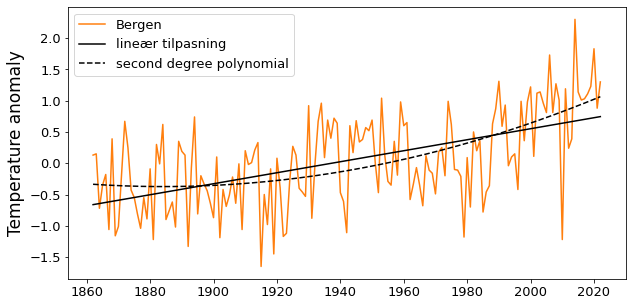

In [24]:
# 🎨
plt.figure(figsize=(10,5))
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen')
# trenden til hele tidsserine
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) # 🎯
plt.plot(time['Bergen'], a*time['Bergen'] + b, 'k', label='lineær tilpasning', ls='-')
# Andregrads polynom tilpasset dataene
a = np.polyfit(time['Bergen'], temp['Bergen'], 2) 
plt.plot(
    time['Bergen'], 
    a[0]*time['Bergen']**2 + a[1]*time['Bergen'] + a[2], 
    'k', label='second degree polynomial', ls='--'
)
plt.ylabel('Temperature anomaly')
plt.legend()
plt.show()

**Question**
- What kind of information do we get from the second degree polynomial that we did not get from the linear trend line?

**Exercise: What about the trend of the Global temperature?**
- Estimate the trendline for the global time series. 
- Plot the global trend line and the trend line for Bergen in the same figure to compare them.
- Tip: Start the time series in 1862 to that the two time series cover the same period. 

In [26]:
time['Bergen'][0], time['Global'][0]

(1862, 1854)

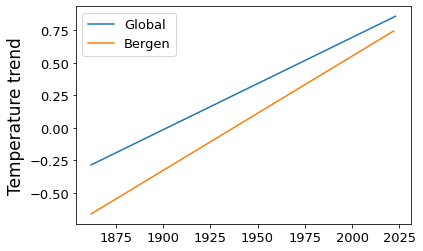

In [27]:
id62=np.where(time['Global']==1862)[0][0] # 🎯

a, b = np.polyfit(time['Global'][id62:], temp['Global'][id62:], 1)   
plt.plot(time['Global'][id62:], a*time['Global'][id62:] + b, label='Global')

a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1)   
plt.plot(time['Bergen'], a*time['Bergen'] + b, label='Bergen')
plt.legend()
plt.ylabel('Temperature trend')

plt.show()

**Question**
- What does the linear trends tell us about the global temperature change vs the temperature change in Bergen?

______________

### Temperature stripes 🎨
**Plot the time series as a histogram with the colors used in the original "temperature stripe"-figure made by [Ed Hawkins](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).**

In [28]:
# The color map from the original temperature stripe figure
# with 8 blue and 8 red colors 🎯
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])


Note: In the code cell below you'll see the line: `color=cmap((temp['Global']+span)/(2*span))`. We want all the temperature anomalies less than 0 to be blue and all the anomalies larger than 0 to be red. It's slighltly complicated to explain why this works, and it's not the main point of this exercise. Below there's a brief explanation, but feel free to skip these details. 

To make the anomalies above 0 red and the anomalies below 0 blue, we normalize the temperature values so that they're between 0 and 1. Before normalizing, the values at the beginning of the time series are close to 0. After normalizing, the values that were 0 become 0.5, i.e., just between 0 and 1. The colors at the beginning of the time series are therefore closer to white because the colors at the middle of the vector `cmap` are white. Towards the end of the time series the temperature anomalies are well above 0 (close to 1 after normalizing), and are therefore dark red. The variable `max_anomaly` is the largest temperature anomaly. By using this value as the limits of the normalizing, the largest anomaly in our plot gets the darkest red color.

In [29]:
max_anomaly=max(temp['Global']) # 🎯

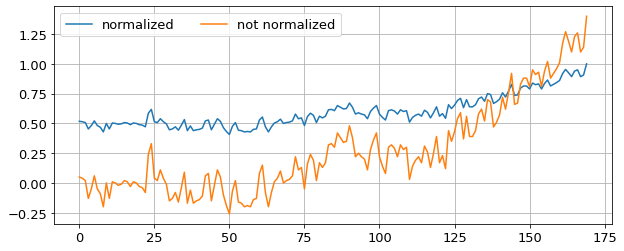

In [32]:
# This figure shows that anomalies closer to 0 becomes 0.5, 
# while the max anomaly (at the end of the time series) becomes 1. 🎨
# If there were negative anomalies as strong at the strongest positive anomaly these would have been
# 0 in the figure below. 
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.plot((temp['Global']+max_anomaly)/(2*max_anomaly), label='normalized')
plt.plot(temp['Global'], label='not normalized')
plt.legend(ncol=2)
plt.grid()

(-2.0, 2.4)

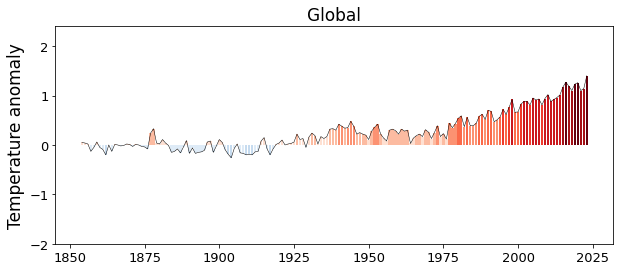

In [33]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(
    time['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
    
plt.plot(time['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylabel('Temperature anomaly')
plt.title('Global')
plt.ylim(-2, 2.4)

Text(0.5, 1.0, 'Bergen')

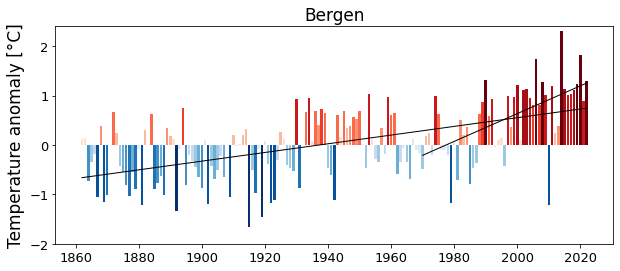

In [34]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(time['Bergen'], temp['Bergen'], color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)))
plt.ylim(-2, 2.4)

# Add the trend lines calculated earlier 
idt=[0, id70]
for count,start in enumerate(idt):
    a, b = np.polyfit(time['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        time['Bergen'][start:], a*time['Bergen'][start:] + b, 
        'k', linewidth=1
    )
plt.ylabel('Temperature anomaly [°C]')
plt.title('Bergen')


________________________
### Part 3: CO2 in the atmosphere 💾

Temperature is closely tied to CO2 in the atmosphere since it effects the global radiation budget. This becomes clear if we plot the tmeperature anomalies in the same figure as CO2.

We have to combine two data sets of CO2. They are both available through NOAA. The first data set is from Law station in Antarctica and is based on ice cores. This stops in 2004. The second data set is from Mauna Loa and starts in 1959.

In [35]:
# Import the data set of CO2 from ice cores in Antarctica (1832-2004) 💾
path=r'C:\Users\iren_\Documents\GEOFpython\IkkeGit'
file=r'\CO2_Law.txt'

df = pd.read_csv(
    path+file, 
    delim_whitespace=True,
    decimal='.', 
    index_col=False, 
    # there are 2013 lines with information at the start of the data set that we don't need
    skiprows=2013, 
    # there are 3676-2187 lines with information at the end of the data set that we don't need,
    # i.e., the file has 3676 lines, and the info we need ends on line 2187
    skipfooter=3676-2187,
    engine='python'
)

In [37]:
df

,1831,755.4,0.7,764.6,1831.0,284.0,0.1,1831.0.1,273.3,-0.5
0,1832,756.0,0.7,765.2,1832.0,284.0,0.0,1832.0,272.8,-0.6
1,1833,756.7,0.8,766.0,1833.0,284.0,0.0,1833.0,272.1,-0.8
2,1834,757.6,1.0,766.9,1834.0,284.0,-0.1,1834.0,271.2,-0.9
3,1835,758.8,1.3,768.0,1835.0,283.9,-0.1,1835.0,270.4,-0.8
4,1836,760.1,1.4,769.4,1836.0,283.9,0.0,1836.0,269.7,-0.6
...,...,...,...,...,...,...,...,...,...,...
168,2000,1703.4,3.9,1724.2,2000.0,366.8,1.9,2000.0,315.4,0.8
169,2001,1706.5,2.4,1727.3,2001.0,368.7,1.9,2001.0,316.2,0.8
170,2002,1708.3,1.2,1729.1,2002.0,370.6,2.0,2002.0,317.0,0.8
171,2003,1709.1,0.6,1730.0,2003.0,372.6,2.0,2003.0,317.8,0.8


In [38]:
# 🗃️
timeco2_law=np.copy(df.iloc[:,0]) # the first column is time
co2_law=np.copy(df.iloc[:,5]) # the 6th column is the CO2 data

Text(0, 0.5, 'CO2')

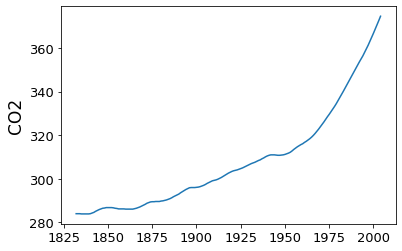

In [40]:
# 🎨
plt.plot(timeco2_law, co2_law)
plt.ylabel('CO2')

In [41]:
# Import the CO2 data from direct measurements (1959-) 💾
file='/CO2_mlo.txt'

df = pd.read_csv(
    path+file, 
    sep=' ', 
    decimal='.', 
    skipinitialspace=True,
    skiprows=55
)

In [43]:
# 🗃️
timeco2_mlo=np.copy(df.iloc[:,0])
co2_mlo=np.copy(df.iloc[:,1])

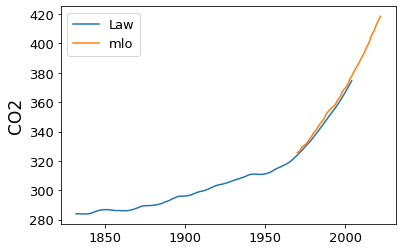

In [45]:
# 🎨
plt.plot(timeco2_law, co2_law, label='Law')
plt.plot(timeco2_mlo, co2_mlo, label='mlo')
plt.ylabel('CO2')
plt.legend()


In [47]:
print(
    'The data sets overlap. The data set from Law ends in', timeco2_law[-1], 
    'while the data set from Muana Loa starts in', timeco2_mlo[0]
)


The data sets overlap. The data set from Law ends in 2004 while the data set from Muana Loa starts in 1970


In [49]:
# 🗃️ 🎯
# To combine the data sets we take the average between the two sources in the period that overlaps. 
# We make two new variables that span the full time period: "timeco2" ...
timeco2=np.arange(timeco2_law[0], timeco2_mlo[-1]+1, 1)
timeco2

array([1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842,
       1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875,
       1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 19

In [50]:
# ... and "co2" 🗃️ 🎯
# Give "co2" two columns to fill data from Law into column 1 and data from Muana Loa in column 2.
# But: let them use the same time vector and fill the column with NaN where the two respective CO2 time 
# series don't have data. 
co2=np.nan*np.zeros((len(timeco2),2))

In [51]:
# 🗃️
# Plug in data from Law in column 1
# Year 1832 to 2004
id2004=np.where(timeco2==timeco2_law[-1])[0][0]+1 # +1 to include 2004
co2[:id2004, 0]=co2_law

# Plug in data from Muana Loa in column 2
# Year 1959 to 2022 (or later depending on when you downloaded the data
id1959=np.where(timeco2==timeco2_mlo[0])[0][0]
co2[id1959:, 1]=co2_mlo

# Redefine the variable "co2" to be the average of the two columns 🎯
co2=np.nanmean(co2,1)

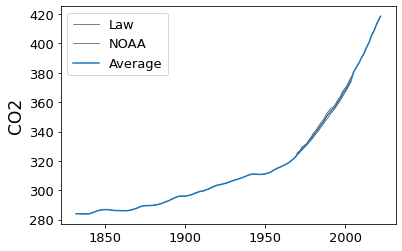

In [53]:
# 🎨
# Plot CO2 from Law and Muana Loa as thin black lines in the background
plt.plot(timeco2_law, co2_law, 'k', lw=.5, label='Law')
plt.plot(timeco2_mlo, co2_mlo, 'k', lw=.5, label='NOAA')
# Plot the average CO2 at Law and  Muana Loa in blue to check that the estimate is reasonable. 
plt.plot(timeco2, co2, label='Average')
plt.ylabel('CO2')
plt.legend()

# This is a reasonable solution since the overlapping measurements have very similar values. 

_____________________________
### Put everything together in one figure:

**Make a figure with temperature stripes, a second degree fitted polynomial, and global CO2 levels**

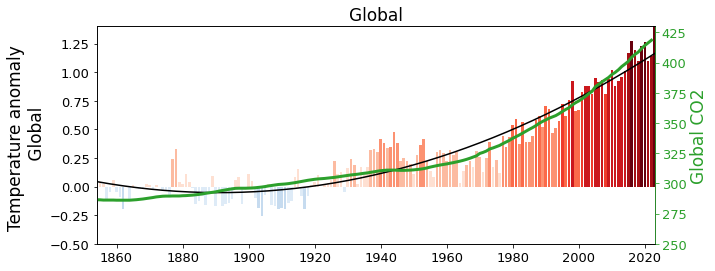

In [55]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    time['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) # normalize data values to the range [0, 1]
) 
plt.title('Global')
ax.set_ylim(-0.5, 1.4)

# Add trend lines
a = np.polyfit(time['Global'], temp['Global'], 2)   
ax.plot(
    time['Global'], a[0]*time['Global']**2 
    + a[1]*time['Global'] + a[2], 
    'k'
)
ax.set_ylabel('Temperature anomaly \n Global')
    
# Add global CO2
ax2=ax.twinx()
ax2.plot(timeco2, co2, 'C2', linewidth=3)
# Adjust the axis in the figure to show the information clearly
ax2.set_ylim(250, 430)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')


plt.xlim(time['Global'][0], time['Global'][-1])
plt.show()

#### Ærlig visualisering
Nå har vi justert grensene til både den høyre og venstre y-aksen slik at de tydelig viser det vi ønsker å formidle, i.e., at temperatur og CO2 henger sammen. Men hva synes du om å tilpasse aksene slik som over?

Det er viktig å være bevisst på at man visualiserer data og resultater på en ærlig måte. Doble y-akser kan være en veldig god måte å vise sammenheng mellom to variabler på, men det kan også være en fallgruve:

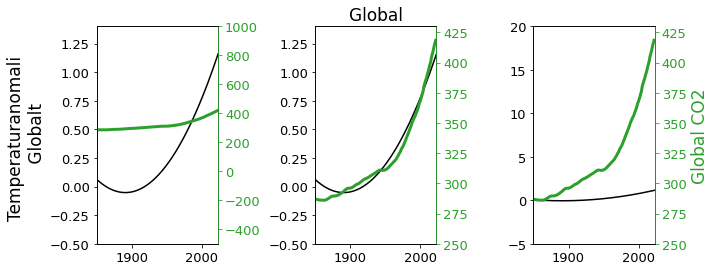

In [39]:
# 🎨
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ylim=[(-0.5, 1.4), (-0.5, 1.4), (-5, 20)] # ylim for temperature
ylim2=[(-500, 1000), (250, 430), (250, 430)] # ylim for CO2

for count, ax in enumerate(axs):
    ax.set_ylim(ylim[count])

    # Legg til trendlinjer fra tidligere
    a = np.polyfit(tid['Global'], temp['Global'], 2)   
    ax.plot(
        tid['Global'], a[0]*tid['Global']**2 
        + a[1]*tid['Global'] + a[2], 'k'
    )
        
    # Legg til global CO2
    ax2=ax.twinx()
    ax2.plot(tidco2, co2, 'C2', linewidth=3)
    # Tilpass aksene i figuren for å vise informasjonen tydeligere
    ax2.set_ylim(ylim2[count])
    ax2.spines['right'].set_color('C2')
    ax2.tick_params(axis='y', colors='C2')
    ax2.yaxis.label.set_color('C2')


    plt.xlim(tid['Global'][0], tid['Global'][-1])
ax2.set_ylabel('Global CO2')
axs[0].set_ylabel('Temperaturanomali \n Globalt')
axs[1].set_title('Global')
plt.subplots_adjust(wspace=.8)

plt.show()

Inntrykket av sammenhengen mellom CO2 og Temperatur er helt avhengig av hvilke akser vi bruker. En sjekk vi kan gjøre for å se om endringene er sammenlignbare er å se på de normaliserte tidsseriene. Da får vi et mye bedre inntrykk av om endringen er betydelig i forhold til intern variasjon og gjennomsnittsverdi eller ikke. Figuren under viser at endringen i både temperaturtrendene og CO2 er på samme skala. Dette gir oss tiltro til at det er ok å bruke doble tilpassede akser. 

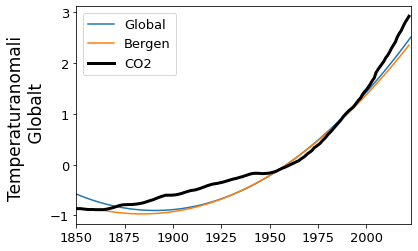

In [40]:
# Normaliserte trendlinjer og CO2 🎨

# Temp
a = np.polyfit(tid['Global'], temp['Global'], 2)   
var=a[0]*tid['Global']**2 + a[1]*tid['Global'] + a[2]
# Normaliser: (var-mean)/std
var=(var-np.mean(var))/np.std(var)
plt.plot(tid['Global'], var, 'C0', label='Global')

a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
var=a[0]*tid['Bergen']**2 + a[1]*tid['Bergen'] + a[2]
var=(var-np.mean(var))/np.std(var)
plt.plot(tid['Bergen'], var, 'C1', label='Bergen')

# CO2
var=(co2-np.mean(co2))/np.std(co2)
plt.plot(tidco2, var, 'k', linewidth=3, label='CO2')

plt.xlim(tid['Global'][0], tid['Global'][-1])
plt.ylabel('Temperaturanomali \n Globalt')
plt.legend()

plt.show()

En annen ting å være særlig oppmerksom på er bruk av fargekart: ikke bruk rainbow/hsv/jet, i.e., "Miscellaneous" fargekart! Disse fargekartene har ujevne overganger mellom fargene og skaper et inntrykk av store endringer der det ikke nødvendigvis er sant. 

**Nå som vi er trygg på sammenhengen mellom endring i temperatur og CO2 lager vi samme figur for Bergen**

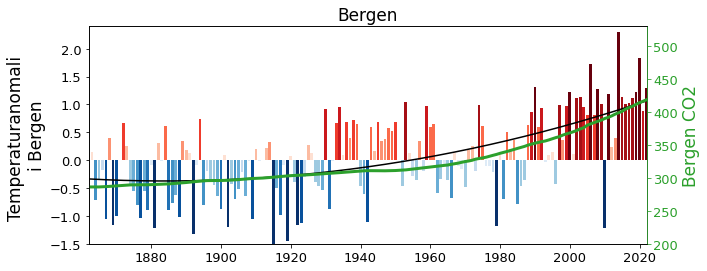

In [41]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    tid['Bergen'], temp['Bergen'], 
    color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
plt.title('Bergen')
ax.set_ylim(-1.5, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
ax.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 'k'
)
ax.set_ylabel('Temperaturanomali \ni Bergen')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.set_ylim(200, 530)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Bergen CO2')

plt.xlim(tid['Bergen'][0], tid['Bergen'][-1])
plt.show()

**Spørsmål**
- Hva tror du den globale temperaturanomalien vil være i 2040? Hvilke antakelser gjør du for å komme frem til svaret ditt? 
- Hva tror du temperaturanomalien i Bergen vil være i 2040?
- Har du mest tiltro til svaret ditt for Bergen eller globalt? 
